In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from sklearn.preprocessing import  LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

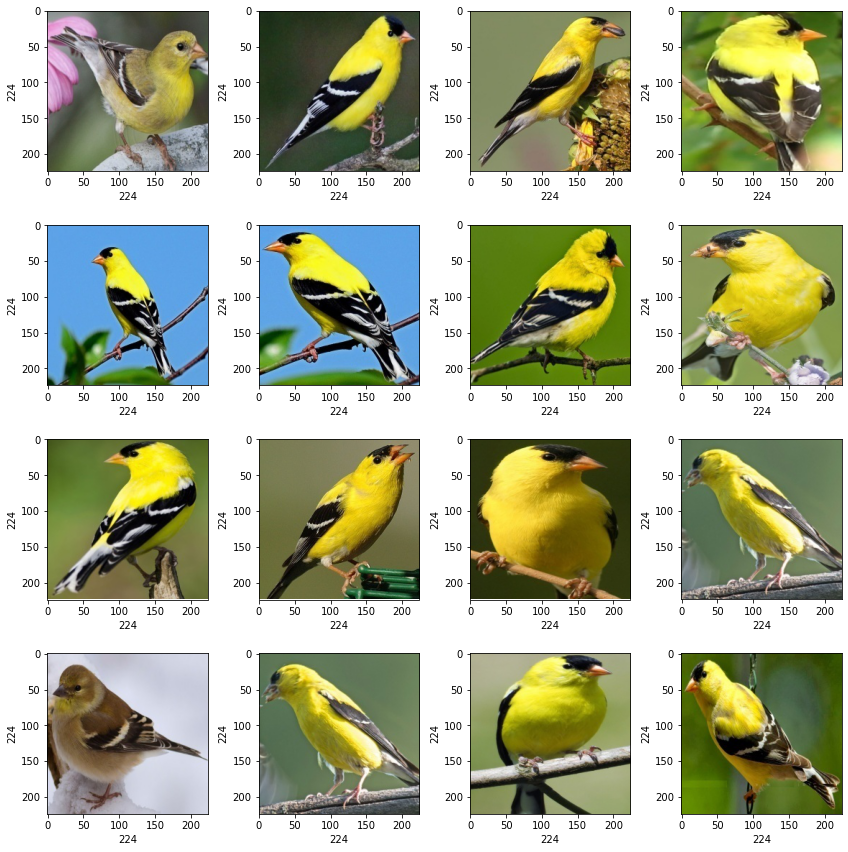

In [14]:
plt.figure(figsize=(12,12))
path = "Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [15]:
dir = "Bird Speciees Dataset"
root_dir = os.listdir(dir)
image_list, label_list = [], []

In [16]:
for directory in root_dir:
    for files in os.listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        img = cv2.imread(image_path)
        img = image.img_to_array(img)
        image_list.append(img)
        label_list.append(directory)

In [17]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [18]:
num_classes = len(label_counts)
num_classes

6

In [22]:
image_list[0].shape

(224, 224, 3)

In [20]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state= 10)

In [35]:
x_train = np.array(x_train, dtype=np.float16)/255.0
x_test = np.array(x_test, dtype= np.float16)/255.0
x_train = x_train.reshape( -1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)
print(x_train)


[[[[0.902  0.6196 0.4353]
   [0.898  0.6157 0.4314]
   [0.894  0.612  0.4275]
   ...
   [0.9097 0.6196 0.4314]
   [0.906  0.6157 0.4275]
   [0.906  0.6157 0.4275]]

  [[0.906  0.612  0.4314]
   [0.902  0.608  0.4275]
   [0.898  0.604  0.4236]
   ...
   [0.9097 0.6196 0.4314]
   [0.9097 0.6196 0.4314]
   [0.9097 0.6196 0.4314]]

  [[0.9097 0.608  0.4275]
   [0.9097 0.608  0.4275]
   [0.906  0.604  0.4236]
   ...
   [0.898  0.6157 0.4275]
   [0.902  0.6196 0.4314]
   [0.906  0.6235 0.4353]]

  ...

  [[0.8745 0.608  0.4236]
   [0.8745 0.608  0.4236]
   [0.8745 0.608  0.4236]
   ...
   [0.1882 0.196  0.149 ]
   [0.1726 0.1882 0.1451]
   [0.1726 0.1882 0.1451]]

  [[0.8745 0.608  0.4236]
   [0.8706 0.604  0.4197]
   [0.8706 0.604  0.4197]
   ...
   [0.1843 0.1804 0.1412]
   [0.1765 0.1804 0.1451]
   [0.1765 0.1882 0.153 ]]

  [[0.8745 0.608  0.4236]
   [0.8706 0.604  0.4197]
   [0.8667 0.6    0.4158]
   ...
   [0.2079 0.204  0.1647]
   [0.2118 0.2157 0.1804]
   [0.2274 0.2313 0.196 ]]]


 

In [36]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [37]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [38]:
# Creating the model
model = Sequential()
model.add(Conv2D(filters= 8, kernel_size= (3,3), padding="same", input_shape= (224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters= 16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters= 32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0

2021-12-08 13:34:55.943341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
model.compile(loss = 'categorical_crossentropy', optimizer= Adam(0.0005), metrics=['accuracy'])

In [42]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs= epochs, validation_data= (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 9s 1s/step - loss: 1.7835 - accuracy: 0.1931 - val_loss: 1.7350 - val_accuracy: 0.4231
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 1.7234 - accuracy: 0.3764 - val_loss: 1.6706 - val_accuracy: 0.2462
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 1.6605 - accuracy: 0.2568 - val_loss: 1.5625 - val_accuracy: 0.3846
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 1.5628 - accuracy: 0.4614 - val_loss: 1.4807 - val_accuracy: 0.4615
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 1.4628 - accuracy: 0.5039 - val_loss: 1.3800 - val_accuracy: 0.5615
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.3465 - accuracy: 0.5097 - val_loss: 1.2673 - val_accuracy: 0.5462
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 1.2292 - accuracy: 0.6004 - val_loss: 1.1627 - val_accuracy: 0.5692
Epoch 8/50
5/5 [=========================

In [43]:
model.save("model.h5")

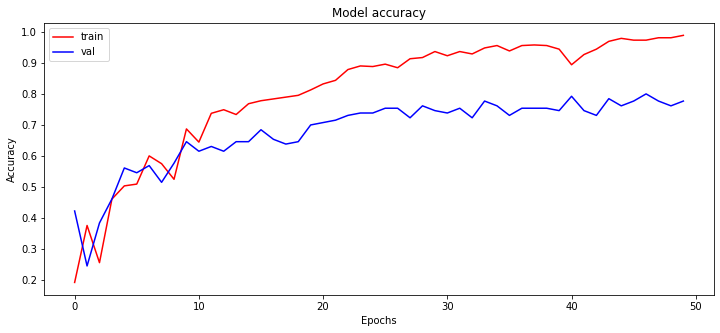

In [44]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

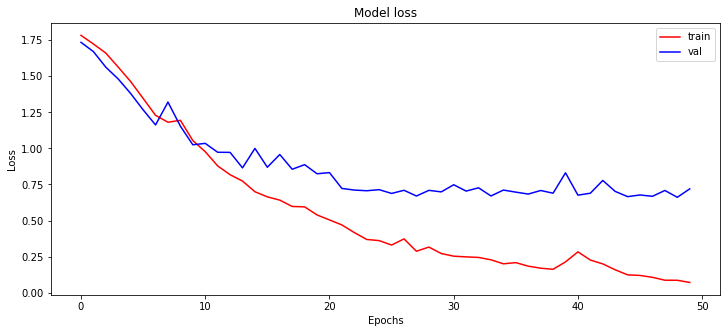

In [45]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [50]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 1s 150ms/step - loss: 0.5823 - accuracy: 0.8098
Test Accuracy: 80.98159432411194


In [51]:
y_pred = model.predict(x_test)

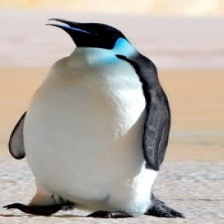

In [52]:
img = image.array_to_img(x_test[5])
img

In [53]:
labels = lb.classes_
print(labels)
print("Originally : ", labels[np.argmax(y_test[5])])
print("Predicted : ", labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  EMPEROR PENGUIN
Predicted :  EMPEROR PENGUIN
